In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

# Intrusion Detection Evaluation Dataset (CIC-IDS2017)
### FTP Attack Data

Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

[https://www.unb.ca/cic/datasets/ids-2017.html]


In [4]:
# Load Data
df = pd.read_csv("data/CICIDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv")
X = df

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [12]:
X[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [13]:
X.replace('BENIGN', 0, inplace=True)
X.replace('FTP-Patator', 1, inplace=True)
X.replace('SSH-Patator', 1, inplace=True)

In [14]:
X[' Label'].unique()

array([0, 1])

In [15]:
# Clean Data
if(np.any(np.isnan(X)) or np.all(np.isfinite(X))):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep]

X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [16]:
# Scale Data
scaled_features = MinMaxScaler().fit_transform(X.values)
X = pnd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.001343,0.000005,0.000029,0.000014,0.000181,5.709729e-07,0.008864,0.0,0.013454,0.019887,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001343,0.000008,0.000039,0.000014,0.000247,4.695375e-06,0.012087,0.0,0.014269,0.024506,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001343,0.000010,0.000029,0.000014,0.001143,4.513557e-06,0.055923,0.0,0.084883,0.125466,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001343,0.000004,0.000029,0.000014,0.000186,5.901116e-07,0.009106,0.0,0.013821,0.020429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001343,0.000006,0.000039,0.000014,0.000252,4.695375e-06,0.012329,0.0,0.014555,0.024997,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y_label = X.pop(' Label')
y_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

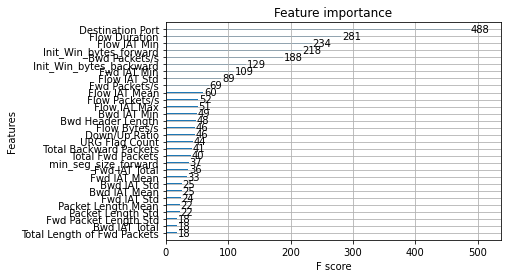

In [19]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

mod = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 5, n_estimators = 600)
mod.fit(X, y_label)
plot_importance(mod, max_num_features=30)
plt.show()

In [20]:
# Important Features
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
reg.fit(X, y_label)

x = {}
# Print the name and gini importance of each feature
for feature in zip(list(X.columns), reg.feature_importances_):
    print(feature)
    x[feature[0]] = feature[1]

(' Destination Port', 0.7913485403428863)
(' Flow Duration', 6.680381247727618e-05)
(' Total Fwd Packets', 0.032931692759522006)
(' Total Backward Packets', 1.5720668494852483e-05)
('Total Length of Fwd Packets', 0.008680306575649291)
(' Total Length of Bwd Packets', 0.0)
(' Fwd Packet Length Max', 0.0005239482317650208)
(' Fwd Packet Length Min', 0.0)
(' Fwd Packet Length Mean', 1.165528601133462e-05)
(' Fwd Packet Length Std', 0.00012718220458762708)
('Bwd Packet Length Max', 0.0)
(' Bwd Packet Length Min', 1.9958469414889982e-05)
(' Bwd Packet Length Mean', 0.0)
(' Bwd Packet Length Std', 0.0)
('Flow Bytes/s', 4.791847819701099e-07)
(' Flow Packets/s', 0.00014983236489749357)
(' Flow IAT Mean', 5.265547222189067e-05)
(' Flow IAT Std', 1.2718096278821408e-05)
(' Flow IAT Max', 5.425766050917199e-05)
(' Flow IAT Min', 0.00019253428573246195)
('Fwd IAT Total', 4.471495121152202e-05)
(' Fwd IAT Mean', 5.217670158088329e-05)
(' Fwd IAT Std', 4.588729257101406e-06)
(' Fwd IAT Max', 4.7759

In [21]:
# Create training & testing datasets
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# Confusion Matrix
# Precision & Recall
# plot num of bins vs. accuracy, against no bin approach
# Use other datasets

# Using Machine Learning to predict DDos attack
created two different classification models, a Support Vector Machine (SVM) and Multilayer Perceptron (MLP) neural network. 
These models will be used as baselines for validating the discretization of the features.

**SVM accuracy score: 99.8%**

**MLP accuracy score: 99.9%**

In [23]:
# Support Vector Machine
from sklearn.svm import LinearSVC
linear_SVC = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    linear_SVC.fit(X_train[train], y_train[train])
    accuracy = linear_SVC.score(X_test[test], y_test[test])
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')
  #  display = PrecisionRecallDisplay.from_estimator(linear_SVC, X_test[test], y_test[test], name="LinearSVC")   
  #  _ = display.ax_.set_title("2-class Precision-Recall curve")

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.9420951654343704,
 Confusion Matrix:
[[81183    28]
 [ 5133  2785]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.9904744808087155,
 Confusion Matrix:
[[87842   409]
 [  440   438]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [178258 178259 178260 ... 267384 267385 267386],
 Accuracy Score: 0.9805450526764578,
 Confusion Matrix:
[[86336   680]
 [ 1054  1059]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 Accuracy Score: 0.9921686544222419,
 Confusion Matrix:
[[87741    15]
 [  683   690]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 445642 445643 445644],
 Accuracy Score: 0.9912037608410281,
 Confusion Matrix:
[[87566    13]
 [  771   779]]



In [24]:
# MLP Neural Net
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
mlp_clf.
# for train, test in kf.split(X):
#     X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
#     mlp_clf.fit(X_train[train], y_train[train])
#     accuracy = mlp_clf.score(X_test[test], y_test[test])
#     loss = mlp_clf.loss_
#     print(f'train: {train},\n test: {test},\n Loss: {loss},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Loss: 0.003962662124633416,
 Accuracy Score: 0.953640229330521,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Loss: 0.004562118415369055,
 Accuracy Score: 0.9991024245756152,
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [178258 178259 178260 ... 267384 267385 267386],
 Loss: 0.005080597960802125,
 Accuracy Score: 0.9983507051576928,
 Confusion Matrix:
[[86850   166]
 [ 1054  1059]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 Loss: 0.005158298381796013,
 Accuracy Score: 0.9998317046079278,
 Confusion Matrix:
[[87740    16]
 [  683   690]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 44

# Discretized Dataset
Discretize the same dataset, and run the same models to validate that the predicts can still be acheived using discretized data.

### Bin=5

**SVM accuracy score: 99.8%**

**MLP accuracy score: 98.7%**

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer

discrete5 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discrete15 = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
discrete20 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
discrete25 = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')

svm_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}
mlp_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [26]:
# SVM 5 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.9111624723715065,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.987355406208978,
 Confusion Matrix:
[[88004   247]
 [  441   437]]



In [27]:
svm_bin_accuracy

{'5bins': 0.987355406208978,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [28]:
# MLP Neural Net 5 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 layer size: (100,),
 Loss: 0.03781517507901091,
 Accuracy Score: 0.9111512526787017
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 layer size: (100,),
 Loss: 0.0625259257703338,
 Accuracy Score: 0.9880285877772667
 Confusion Matrix:
[[88004   247]
 [  441   437]]



In [30]:
mlp_bin_accuracy

{'5bins': 0.9880285877772667,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 10

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.84**

In [31]:
# SVM 10bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.9099283061629773,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.9293271550224955,
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [178258 178259 178260 ... 267384 267385 267386],
 Accuracy Score: 0.9793894243175622,
 Confusion Matrix:
[[86850   166]
 [ 1054  1059]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 445642 445643 445644],
 Accuracy Score: 0.9883763982542157,
 Confusion Matrix:
[[87566    13]
 [  771   779]]



In [32]:
svm_bin_accuracy

{'5bins': 0.987355406208978,
 '10bins': 0.9883763982542157,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [33]:
# MLP Neural Net 10 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 layer size: (100,),
 Loss: 0.026294215407664048,
 Accuracy Score: 0.9106463665024852
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 layer size: (100,),
 Loss: 0.046676511161511475,
 Accuracy Score: 0.9803543178987759
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 layer size: (100,),
 Loss: 0.04796487368483356,
 Accuracy Score: 0.9871534517384914
 Confusion Matrix:
[[87740    16]
 [  683   690]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 445642 445643 445644],
 layer size: (100,),
 Loss: 0.04807182364304808,
 Accuracy Score: 0.9877032166859271
 Confusion Matrix:
[[87566    13]
 [  771   779]]



In [34]:
mlp_bin_accuracy

{'5bins': 0.9880285877772667,
 '10bins': 0.9877032166859271,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 15

 **SVM Accuracy: 99.85**

**MLP Accuracy: 99.88**

In [35]:
# SVM 15 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.9048233459367883,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.9643774753447251,
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [178258 178259 178260 ... 267384 267385 267386],
 Accuracy Score: 0.9870524745032481,
 Confusion Matrix:
[[86850   166]
 [ 1054  1059]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 Accuracy Score: 0.9922584119646805,
 Confusion Matrix:
[[87740    16]
 [  683   690]]



In [36]:
svm_bin_accuracy

{'5bins': 0.987355406208978,
 '10bins': 0.9883763982542157,
 '15bins': 0.9922584119646805,
 '20bins': 0,
 '25bins': 0}

In [37]:
# MLP Neural Net 15 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 layer size: (100,),
 Loss: 0.018610445114865936,
 Accuracy Score: 0.954470486598077
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 layer size: (100,),
 Loss: 0.03215104420218969,
 Accuracy Score: 0.9928530556833354
 Confusion Matrix:
[[88004   247]
 [  441   437]]



In [38]:
mlp_bin_accuracy

{'5bins': 0.9880285877772667,
 '10bins': 0.9877032166859271,
 '15bins': 0.9928530556833354,
 '20bins': 0,
 '25bins': 0}

### Bins = 20

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.85**

In [39]:
# SVM 20 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.9326481840927195,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.9895769053843306,
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 445642 445643 445644],
 Accuracy Score: 0.9913383971546859,
 Confusion Matrix:
[[87566    13]
 [  771   779]]



In [40]:
svm_bin_accuracy

{'5bins': 0.987355406208978,
 '10bins': 0.9883763982542157,
 '15bins': 0.9922584119646805,
 '20bins': 0.9913383971546859,
 '25bins': 0}

In [41]:
# MLP Neural Net 20 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 layer size: (100,),
 Loss: 0.017660522820740134,
 Accuracy Score: 0.9336803958307621
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 layer size: (100,),
 Loss: 0.030010786375471186,
 Accuracy Score: 0.9931223283106508
 Confusion Matrix:
[[88004   247]
 [  441   437]]



In [42]:
mlp_bin_accuracy

{'5bins': 0.9880285877772667,
 '10bins': 0.9877032166859271,
 '15bins': 0.9928530556833354,
 '20bins': 0.9931223283106508,
 '25bins': 0}

### Bins = 25

 **SVM Accuracy: 99.82**

**MLP Accuracy: 99.87**

In [43]:
# SVM 25 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 Accuracy Score: 0.91599815997038,
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 Accuracy Score: 0.9773586599198913,
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [178258 178259 178260 ... 267384 267385 267386],
 Accuracy Score: 0.9874788228298309,
 Confusion Matrix:
[[86850   166]
 [ 1054  1059]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 Accuracy Score: 0.9899134961684749,
 Confusion Matrix:
[[87740    16]
 [  683   690]]

train: [     0      1      2 ... 356513 356514 356515],
 test: [356516 356517 356518 ... 445642 445643 445644],
 Accuracy Score: 0.9912037608410281,
 Confusion Matrix:
[[87566    13]
 [  771   779]]



In [44]:
svm_bin_accuracy

{'5bins': 0.987355406208978,
 '10bins': 0.9883763982542157,
 '15bins': 0.9922584119646805,
 '20bins': 0.9913383971546859,
 '25bins': 0.9912037608410281}

In [45]:
# MLP Neural Net 25 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 89129  89130  89131 ... 445642 445643 445644],
 test: [    0     1     2 ... 89126 89127 89128],
 layer size: (100,),
 Loss: 0.017411637866833776,
 Accuracy Score: 0.9179055077471979
 Confusion Matrix:
[[81015   196]
 [   18  7900]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [ 89129  89130  89131 ... 178255 178256 178257],
 layer size: (100,),
 Loss: 0.027640453718629658,
 Accuracy Score: 0.9824748398388852
 Confusion Matrix:
[[88004   247]
 [  441   437]]

train: [     0      1      2 ... 445642 445643 445644],
 test: [267387 267388 267389 ... 356513 356514 356515],
 layer size: (100,),
 Loss: 0.027664256212703506,
 Accuracy Score: 0.9922023135006564
 Confusion Matrix:
[[87740    16]
 [  683   690]]



In [46]:
mlp_bin_accuracy

{'5bins': 0.9880285877772667,
 '10bins': 0.9877032166859271,
 '15bins': 0.9928530556833354,
 '20bins': 0.9931223283106508,
 '25bins': 0.9922023135006564}